# Tensorflow Classification

## 1st Model - basic

In [1]:
# ignore the import error if using pycharm and you have successfully installed Tensorflow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import imdb

2022-09-28 10:10:09.664874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
# 1 is positive and 0 is negative
train_labels[0]

1

In [5]:
# get the word index
word_index = tf.keras.datasets.imdb.get_word_index()

In [6]:
# word_index

In [7]:
# decode the word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np

In [9]:
# one hot encode the array
one_hot = tf.one_hot(train_data[0], 10000)
# flatten it so that all 1's ar ein a single array
one_hot_flatten = np.array(one_hot).flatten()
one_hot_flatten

2022-09-28 10:10:16.320433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


array([0., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [10]:
# onehot encode everything
#x_train = np.array(tf.one_hot(train_data, 10000)).flatten()
#x_test = np.array(tf.one_hot(test_data, 10000)).flatten()

In [11]:
# This is not efficient at all and is not currently working
# def one_hot_encode(data):
#     updated_data = []
#     for item in data:
#         one_hot = tf.one_hot(item, 10000)
#         updated_data.append(np.array(one_hot).flatten())
#     return np.array(updated_data)


In [12]:
# x_train = one_hot_encode(train_data)
# x_test = one_hot_encode(test_data)

In [13]:
# this one-hot encodes the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Model Training

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5083 - accuracy: 0.7771 - val_loss: 0.3747 - val_accuracy: 0.8755
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2978 - accuracy: 0.9025 - val_loss: 0.3237 - val_accuracy: 0.8686
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2149 - accuracy: 0.9301 - val_loss: 0.3411 - val_accuracy: 0.8567
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1740 - accuracy: 0.9438 - val_loss: 0.2780 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1391 - accuracy: 0.9558 - val_loss: 0.2884 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1168 - accuracy: 0.9630 - val_loss: 0.2963 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0956 - accuracy: 0.9718 - val_loss: 0.3321 - val_accuracy: 0.8752
Epoch 8/20
30

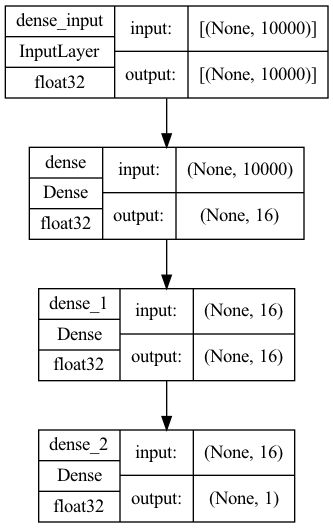

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)


### Plot the loss history

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

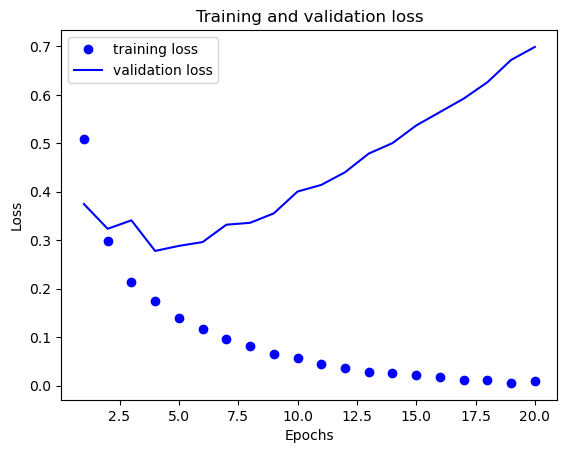

In [20]:
# Plot the history data
import matplotlib.pyplot as plt
def plot_history(history_dict, history_column1, history_column2, label1, label2,
                 title, xlabel, ylabel,
                 color_type1="bo", color_type2="b" ):
    loss_values = history_dict[history_column1]
    val_loss_values = history_dict[history_column2]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, color_type1, label=label1)
    plt.plot(epochs, val_loss_values, color_type2, label=label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_history(history_dict, 'loss', 'val_loss', "training loss", "validation loss", "Training and validation loss", "Epochs", "Loss")

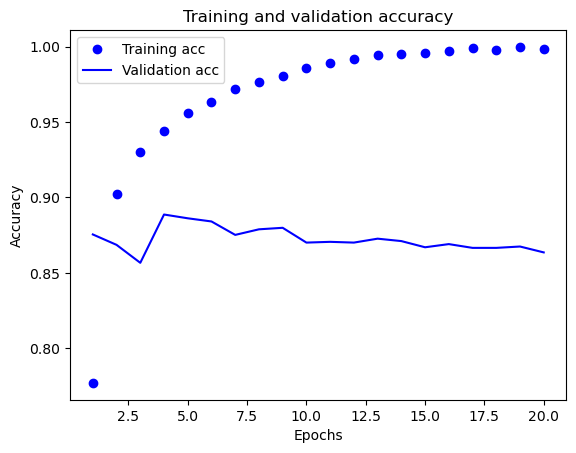

In [21]:
plot_history(history_dict,"accuracy", "val_accuracy", "Training acc", "Validation acc", "Training and validation accuracy", "Epochs", "Accuracy")

### Evaluate the data
The first number represents the test loss and the second number represents the test accuracy.

In [22]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 939us/step - loss: 0.7714 - accuracy: 0.8486


[0.7713631391525269, 0.8485599756240845]

### Generate new predictions
Since we used the `sigmoid` as the activation function for the last layer, then it outputs a value between 0 and 1, which represents the probability of the review being positive or negative.  The higher the score, then the higher the probability that the review is positive and the lower the score, then the lower the probability that the review is negative.

In [23]:
model.predict(x_test)

782/782 [==============================] - 1s 817us/step


array([[0.00541167],
       [1.        ],
       [0.97202545],
       ...,
       [0.00388585],
       [0.00636797],
       [0.89481586]], dtype=float32)

## Additional Experiments
Let's see if we can improve the model.

### Dynamic Model Building Function
This function will dynamically build a Tensorflow model using the functional API.

In [24]:
# build_model(input_shape=(32, 32, 3),layer_units=[16, 16, 1], activations=["relu", "relu", "sigmoid"], optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
def build_model(input_shape, layer_units=[16,16,1], activations=["relu", "relu", "sigmoid"],
                optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"], name="model_name"):
    if(type(input_shape) != tuple):
        raise AssertionError("input_shape must be a tuple")

    if(type(layer_units) != list or type(activations) != list or type(metrics) != list):
        raise AssertionError("layer_units, activations or metrics must be an array")

    if(len(layer_units) != len(activations)):
        raise AssertionError("layer_units array length does not match the array length of activations.")

    output_index = len(layer_units) - 1
    inputs = tf.keras.Input(shape=input_shape)
    prev = None
    x = tf.keras.layers.Dense(layer_units[0], activation=activations[0])(inputs)
    prev = x
    for i in range(1, len(layer_units) - 1):
        x = tf.keras.layers.Dense(layer_units[i], activation=activations[i])(prev)
        prev = x

    outputs = tf.keras.layers.Dense(layer_units[output_index], activation=activations[output_index])(prev)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name=name)
    model.summary()
    model.compile(loss=loss,
                         optimizer=optimizer,
                         metrics=metrics)
    return model

In [25]:
# test the model builder above
my_model = build_model(input_shape=(32,32,3),name="test_model")

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 dense_3 (Dense)             (None, 32, 32, 16)        64        
                                                                 
 dense_4 (Dense)             (None, 32, 32, 16)        272       
                                                                 
 dense_5 (Dense)             (None, 32, 32, 1)         17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


### Model experiment 1 - use more layers

In [26]:
model1 = build_model(input_shape=(10000,), layer_units=[16,16,16,1], activations=["relu", "relu", "relu", "sigmoid"],
                optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"], name="model_name")



Model: "model_name"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


In [27]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 24ms/step - loss: 0.5934 - accuracy: 0.6995 - val_loss: 0.5200 - val_accuracy: 0.8354
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3822 - accuracy: 0.8919 - val_loss: 0.3555 - val_accuracy: 0.8669
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2496 - accuracy: 0.9218 - val_loss: 0.3461 - val_accuracy: 0.8664
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1784 - accuracy: 0.9445 - val_loss: 0.2923 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1411 - accuracy: 0.9543 - val_loss: 0.3050 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1080 - accuracy: 0.9681 - val_loss: 0.3250 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0874 - accuracy: 0.9749 - val_loss: 0.4880 - val_accuracy: 0.8568
Epoch 8/20
30

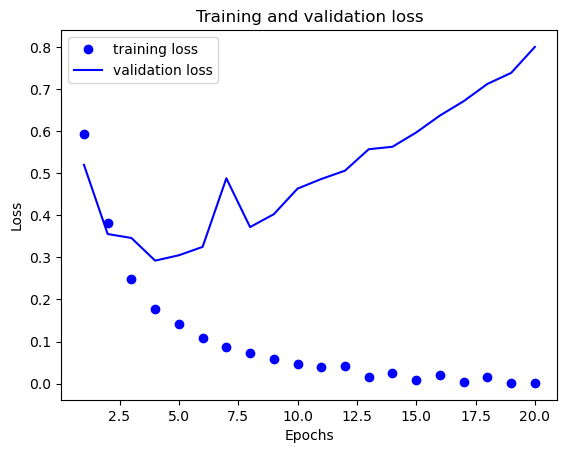

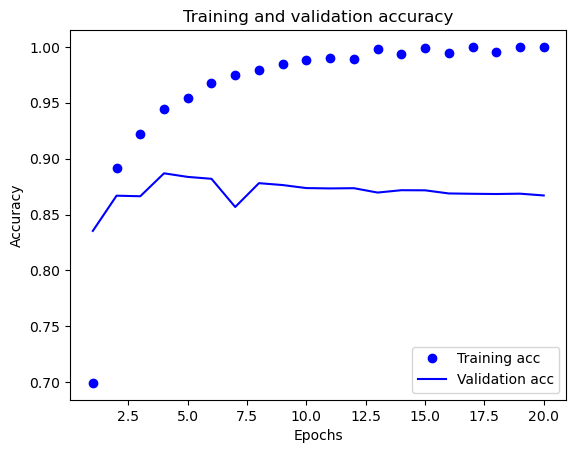

In [28]:
history_dict1 = history1.history
history_dict1.keys()

plot_history(history_dict1, 'loss', 'val_loss', "training loss", "validation loss", "Training and validation loss", "Epochs", "Loss")

plot_history(history_dict1, "accuracy", "val_accuracy", "Training acc", "Validation acc", "Training and validation accuracy", "Epochs", "Accuracy")


In [33]:
# [test_lost, test_accuracy]
results1 = model1.evaluate(x_test, y_test)
print("results1")
print(results1)
print("original results")
print(results)

782/782 [==============================] - 1s 1ms/step - loss: 0.8744 - accuracy: 0.8511
results1
[0.8744410276412964, 0.8511199951171875]
original results
[0.7713631391525269, 0.8485599756240845]


In [30]:
model1.predict(x_test)


782/782 [==============================] - 1s 854us/step


array([[0.00755296],
       [1.        ],
       [0.9999938 ],
       ...,
       [0.00425929],
       [0.01849378],
       [0.9468872 ]], dtype=float32)

#### Experiment 1 Conclusion
We used 1 additional layer and kept all other parameters the same and it seems it did not improve the accuracy by much.

### Experiment 2 - use one layer

In [36]:
model2 = build_model(input_shape=(10000,), layer_units=[16,1], activations=["relu", "sigmoid"],
                optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"], name="experiment2")



Model: "experiment2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [37]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4987 - accuracy: 0.7939 - val_loss: 0.3838 - val_accuracy: 0.8748
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3105 - accuracy: 0.9075 - val_loss: 0.3186 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2405 - accuracy: 0.9245 - val_loss: 0.2957 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1983 - accuracy: 0.9390 - val_loss: 0.2836 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1677 - accuracy: 0.9495 - val_loss: 0.3120 - val_accuracy: 0.8732
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1439 - accuracy: 0.9580 - val_loss: 0.2765 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1270 - accuracy: 0.9641 - val_loss: 0.2826 - val_accuracy: 0.8871
Epoch 8/20
30

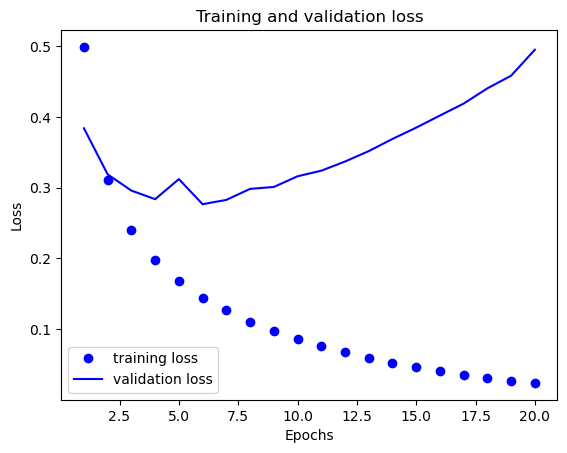

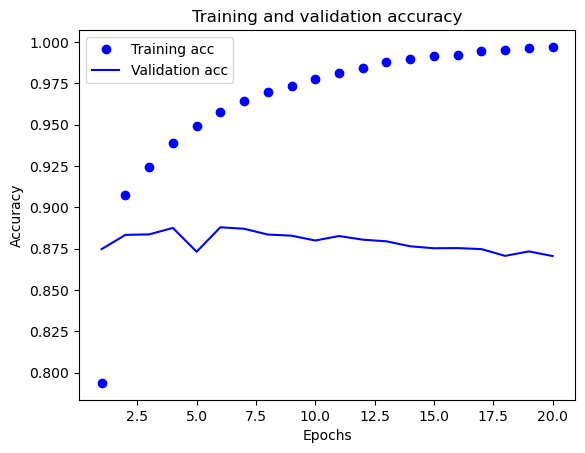

In [38]:
history_dict2 = history2.history
history_dict2.keys()

plot_history(history_dict2, 'loss', 'val_loss', "training loss", "validation loss", "Training and validation loss", "Epochs", "Loss")

plot_history(history_dict2, "accuracy", "val_accuracy", "Training acc", "Validation acc", "Training and validation accuracy", "Epochs", "Accuracy")

In [40]:
# [test_lost, test_accuracy]
results2 = model2.evaluate(x_test, y_test)
print("results2")
print(results2)
print("results1")
print(results1)
print("original results")
print(results)

782/782 [==============================] - 1s 952us/step - loss: 0.5251 - accuracy: 0.8546
results2
[0.5250852108001709, 0.8545600175857544]
results1
[0.8744410276412964, 0.8511199951171875]
original results
[0.7713631391525269, 0.8485599756240845]


#### Conclusion
For this experiment we removed a hidden layer and kept everything the same. In this case the test loss dropped significantly and test accuracy improved slightly.

## Hyper Parameter Tuning
This section uses Tensorflows hyperparmater tuning to conduct multiple experiments in one shot.

In [47]:
import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(10000)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=16, max_value=512, step=32)
    hp_layers = hp.Int('layers', min_value=2, max_value=6, step=1)
    hp_activation = hp.Choice('activation', values=["relu", "tanh"])
    for i in range(0, hp_layers):
        model.add(keras.layers.Dense(units=hp_units, activation=hp_activation))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    # hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    hp_loss = hp.Choice('loss', values=["mse", "binary_crossentropy"])
    model.compile(optimizer="rmsprop",
                loss=hp_loss,
                metrics=['accuracy'])
    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}
layer count is {best_hps.get('layers')}
loss function is {best_hps.get('loss')}
activation function is {best_hps.get('activation')}
""")

Trial 30 Complete [00h 01m 43s]
val_accuracy: 0.8866000175476074

Best val_accuracy So Far: 0.8930000066757202
Total elapsed time: 00h 27m 53s
INFO:tensorflow:Oracle triggered exit


KeyError: 'learning_rate does not exist.'

### Build the best model and train it

In [49]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_tuner = tuner.hypermodel.build(best_hps)
history_tuner = model_tuner.fit(x_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history_tuner.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
625/625 [==============================] - 17s 27ms/step - loss: 0.3422 - accuracy: 0.8589 - val_loss: 0.2718 - val_accuracy: 0.8900
Epoch 2/50
625/625 [==============================] - 17s 27ms/step - loss: 0.2095 - accuracy: 0.9196 - val_loss: 0.2786 - val_accuracy: 0.8918
Epoch 3/50
625/625 [==============================] - 17s 27ms/step - loss: 0.1642 - accuracy: 0.9365 - val_loss: 0.2845 - val_accuracy: 0.8856
Epoch 4/50
625/625 [==============================] - 17s 27ms/step - loss: 0.1277 - accuracy: 0.9519 - val_loss: 0.3491 - val_accuracy: 0.8800
Epoch 5/50
625/625 [==============================] - 17s 27ms/step - loss: 0.0979 - accuracy: 0.9644 - val_loss: 0.3926 - val_accuracy: 0.8784
Epoch 6/50
625/625 [==============================] - 17s 27ms/step - loss: 0.0673 - accuracy: 0.9760 - val_loss: 0.4396 - val_accuracy: 0.8788
Epoch 7/50
625/625 [==============================] - 17s 27ms/step - loss: 0.0377 - accuracy: 0.9869 - val_loss: 0.5327 - val_accuracy:

### Rebuild the model based on the best number of epochs above

In [51]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 14s 21ms/step - loss: 0.3418 - accuracy: 0.8556 - val_loss: 0.2773 - val_accuracy: 0.8916
Epoch 2/2
625/625 [==============================] - 14s 22ms/step - loss: 0.2125 - accuracy: 0.9180 - val_loss: 0.2894 - val_accuracy: 0.8892


### Evaluate the results

In [53]:
eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

782/782 [==============================] - 2s 3ms/step - loss: 0.3120 - accuracy: 0.8799
[test loss, test accuracy]: [0.31196916103363037, 0.8798800110816956]


### Conclusion
Implementing the Keras Hyperparameter tuning is well worth the effort. There are definitely some opportunities to make the model more dynamic and include all the hyperparameter options.
For example:
1) I hard-code the optimizer as a string.  It would be better to use the class name instead and include a learning rate

I definitely need to experiement more with this approach. It took about 27 minutes on my laptop CPU to complete all the experiments. No doubt it will be much faster if I run in Colab on a GPU instead.